<a href="https://colab.research.google.com/github/data-alch3m1st/PyTorch_tinkering/blob/main/FoodViz_tinkering_v002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torchvision import models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import os

In [9]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available
    
print(device)

mps


In [10]:
# Load the data from the google drive location:

train_dir = "./data/pizza_steak_sushi/train/"
test_dir = "./data/pizza_steak_sushi/test/"

### EfficientNet_B0 ###

In [15]:
# Load EfficientNet with B0 pretrained weights

weights_eff = models.EfficientNet_B0_Weights.IMAGENET1K_V1
model_eff = models.efficientnet_b0(weights=weights_eff)
preprocess_eff = weights_eff.transforms()

In [16]:
# Use the preprocess transform for EfficientNet_B0 (preprocess_eff)

train_dataset = datasets.ImageFolder(
    root=train_dir
    , transform=preprocess_eff
)

test_dataset = datasets.ImageFolder(
    root=test_dir
    , transform=preprocess_eff
)

train_loader = DataLoader(
    dataset=train_dataset
    , batch_size=32
    , shuffle=True
    , num_workers=2
)

test_loader = DataLoader(
    dataset=test_dataset
    , batch_size=32
    , shuffle=False
    , num_workers=2
)

In [17]:
# EfficientNet_B0 Model, class, device, criterion & optimizer instantiation;

# Number of classes in Pizza–Steak–Sushi
num_classes = len(train_dataset.classes)  # should be 3

# Use ResNet50 V1 backbone
model = model_eff

# Freeze all layers except the final classifier head
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer --> EfficientNet uses model.classifier
model.classifier = nn.Linear(
      in_features=model.classifier[1].in_features
      , out_features=num_classes
)

model = model.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
      model.classifier.parameters()
      , lr=1e-3
)

In [18]:
device

'mps'

In [19]:
# EfficientNet_B0 Training Loop

epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f}%")

Epoch 1/5 | Loss: 1.0128 | Acc: 52.4444%
Epoch 2/5 | Loss: 0.7852 | Acc: 86.2222%
Epoch 3/5 | Loss: 0.6465 | Acc: 91.1111%
Epoch 4/5 | Loss: 0.5843 | Acc: 84.0000%
Epoch 5/5 | Loss: 0.5229 | Acc: 87.5556%


In [20]:
from tqdm import tqdm

In [21]:
# ^^^ It looks like EfficientNet did better on the train loop, so running some more epochs to see if the acc scores can get higher! (Note: ended up re-running another 10 epochs, so 25 epochs in total, w/ 93.333% max acc;)

epochs = 10

for epoch in tqdm(range(epochs)):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f}%")

 10%|████▌                                         | 1/10 [00:14<02:11, 14.64s/it]

Epoch 1/10 | Loss: 0.4845 | Acc: 87.1111%


 20%|█████████▏                                    | 2/10 [00:28<01:52, 14.10s/it]

Epoch 2/10 | Loss: 0.4314 | Acc: 89.3333%


 30%|█████████████▊                                | 3/10 [00:42<01:37, 13.90s/it]

Epoch 3/10 | Loss: 0.3907 | Acc: 92.4444%


 40%|██████████████████▍                           | 4/10 [00:55<01:23, 13.85s/it]

Epoch 4/10 | Loss: 0.3511 | Acc: 96.0000%


 50%|███████████████████████                       | 5/10 [01:10<01:10, 14.10s/it]

Epoch 5/10 | Loss: 0.3879 | Acc: 91.5556%


 60%|███████████████████████████▌                  | 6/10 [01:24<00:56, 14.01s/it]

Epoch 6/10 | Loss: 0.3379 | Acc: 93.3333%


 70%|████████████████████████████████▏             | 7/10 [01:37<00:41, 13.90s/it]

Epoch 7/10 | Loss: 0.3352 | Acc: 92.4444%


 80%|████████████████████████████████████▊         | 8/10 [01:51<00:27, 13.84s/it]

Epoch 8/10 | Loss: 0.3001 | Acc: 95.1111%


 90%|█████████████████████████████████████████▍    | 9/10 [02:05<00:13, 13.75s/it]

Epoch 9/10 | Loss: 0.2675 | Acc: 97.3333%


100%|█████████████████████████████████████████████| 10/10 [02:18<00:00, 13.90s/it]

Epoch 10/10 | Loss: 0.2710 | Acc: 95.5556%


In [22]:
# Running Test Loop on EfficientNet

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.4f}%")

Test Accuracy: 88.0000%


In [21]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

***Save trained model***

In [23]:
# Set up a 'saved_models' directory (if it doesnt already exist):
from datetime import datetime

save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)  # creates it if it doesn't exist

# Add the current date to the filename
current_date = datetime.now().strftime("%Y%m%d")
model_save_path = os.path.join(save_dir, f"efficientnet_b0_pizza_steak_sushi_{current_date}.pth")

In [24]:
# Save the trained model to .pth

# Save only the parameters
torch.save(model.state_dict(), model_save_path)
print(f"Model state_dict saved to: {model_save_path}")

Model state_dict saved to: saved_models/efficientnet_b0_pizza_steak_sushi_20251018.pth


In [25]:
import os
from PIL import Image
import torch
from torchvision import models

# Folder containing unseen images
folder_path = "./data/unseen_pza_stk_ssh/"

# Make a list of image files
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Preprocessing used for EfficientNet_B0
weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1
preprocess = weights.transforms()

# Class names (same as your dataset)
class_names = ["pizza", "steak", "sushi"]

# Ensure the model is in evaluation mode
model.eval()
model = model.to(device)

In [26]:
for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    image = Image.open(img_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = class_names[probabilities.argmax()]

    print(f"{img_name} → Predicted: {predicted_class}")

sushi_003.jpeg → Predicted: sushi
sushi_002.jpeg → Predicted: sushi
pizza_001.jpeg → Predicted: pizza
steak_001.jpeg → Predicted: steak
steak_003.jpeg → Predicted: steak
steak_002.jpeg → Predicted: steak
sushi_001.jpeg → Predicted: sushi
pizza_002.jpeg → Predicted: steak
pizza_003.jpeg → Predicted: pizza


In [27]:
# Extract true labels from filenames
true_labels = [f.split("_")[0] for f in image_files]
print(true_labels)

['sushi', 'sushi', 'pizza', 'steak', 'steak', 'steak', 'sushi', 'pizza', 'pizza']


In [30]:
predicted_labels = []
for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    image = Image.open(img_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = class_names[probabilities.argmax()]
        predicted_labels.append(predicted_class)

    print(f"{img_name} → Predicted: {predicted_class}")

sushi_003.jpeg → Predicted: sushi
sushi_002.jpeg → Predicted: sushi
pizza_001.jpeg → Predicted: pizza
steak_001.jpeg → Predicted: steak
steak_003.jpeg → Predicted: steak
steak_002.jpeg → Predicted: steak
sushi_001.jpeg → Predicted: sushi
pizza_002.jpeg → Predicted: steak
pizza_003.jpeg → Predicted: pizza


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report:\n")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:\n")
print(confusion_matrix(true_labels, predicted_labels))

Classification Report:

              precision    recall  f1-score   support

       pizza       1.00      0.67      0.80         3
       steak       0.75      1.00      0.86         3
       sushi       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9

Confusion Matrix:

[[2 1 0]
 [0 3 0]
 [0 0 3]]


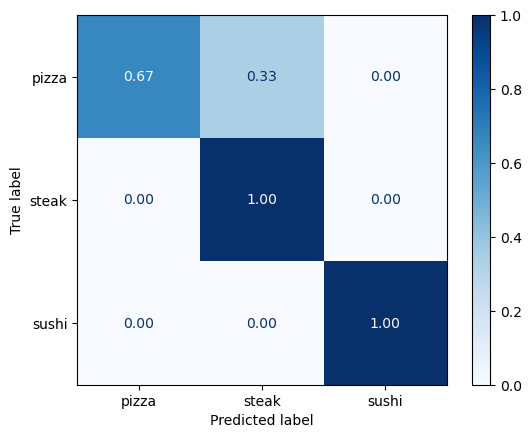

In [37]:
# ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    true_labels, predicted_labels
    , normalize="true", cmap="Blues"
)

# replace default annotations with two-decimal strings
for txt in plt.gca().texts: txt.set_text(f"{float(txt.get_text()):.2f}")
plt.show();

In [32]:
import os
from PIL import Image
import torch
from torchvision import models
from matplotlib import pyplot as plt

In [33]:
def show_image_prediction(img_path):
    # Load and preprocess
    image = Image.open(img_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        pred_class = class_names[probabilities.argmax()]

    # Display with matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {pred_class}", fontsize=14, color='green')
    plt.show();

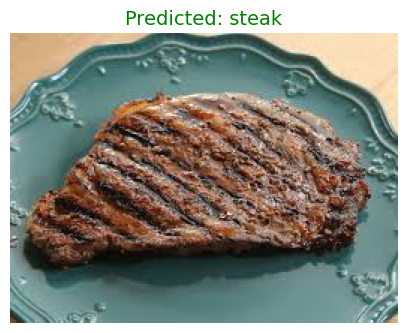

In [40]:
show_image_prediction(os.path.join(folder_path, image_files[3]))

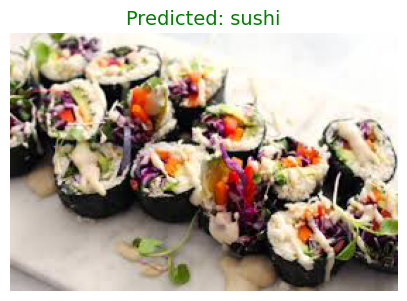

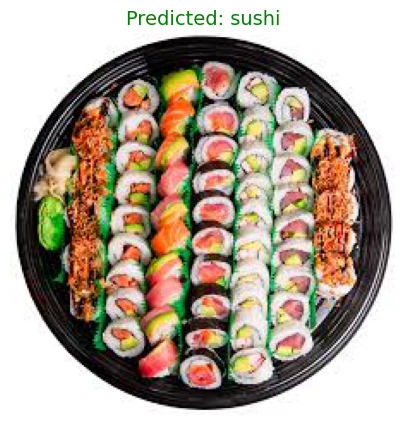

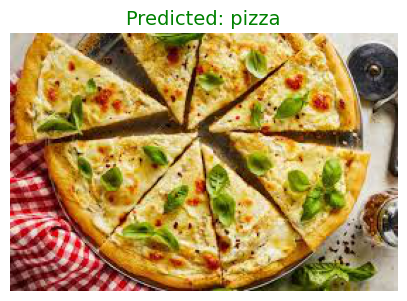

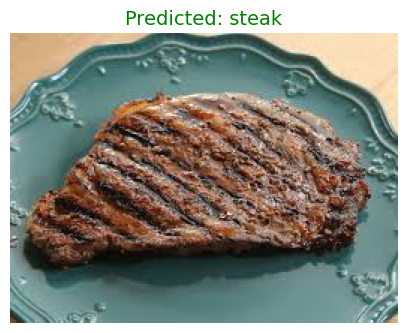

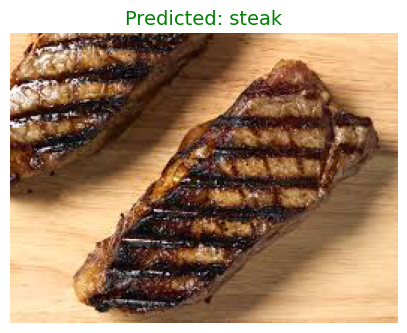

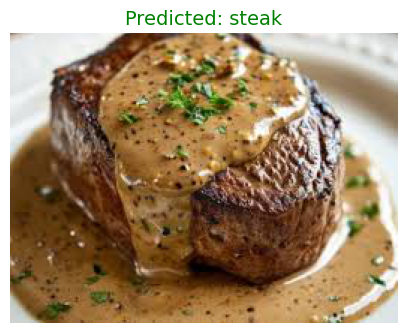

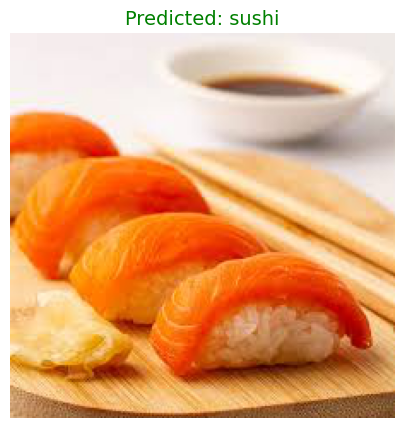

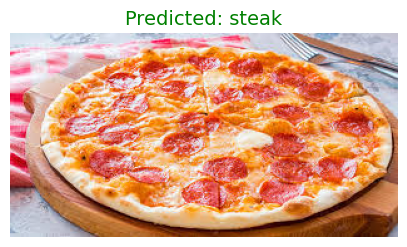

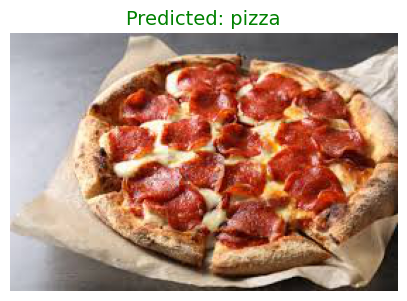

In [35]:
for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    show_image_prediction(img_path)